In [1]:
%matplotlib inline

# General packages for system, time, etc
import os, time, csv, sys
import datetime
from datetime import date
import glob

# scitnific computing and plotting
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# HDDM related packages
import pymc as pm
import hddm
import kabuki
import arviz as az

# parallel processing related
from p_tqdm import p_map
from functools import partial

#from HDDMarviz import HDDMarviz
#from InferenceDataFromHDDM import InferenceDataFromHDDM
#from plot_ppc_by_cond import plot_ppc_by_cond

/opt/conda/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


In [2]:
data = pd.read_csv('/home/jovyan/hddm_data.csv')
data = hddm.utils.flip_errors(data)

In [3]:
def ms4(id, data=None, samples=None, burn=None, save_name="v_model"): 
    """This function instantiate model object passing it our data and tailoring an 
    individual hierarchical DDM around our dataset.It finds a good starting point
    which helps with the convergence.""" 
    
    print('running model%i'%id);
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    m =  hddm.HDDM(data, depends_on={'v': 'Condition'})
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # it's neccessary to save the model data
    m.save(mname)
    
    return m

In [4]:
#pmap is to run multiple chains at once 
samples = 5000  # Cavanagh used 30,000 and 10, 000 burn.
burn = 1500    
thin = 1
chains = 2

model_4 = p_map(partial(ms4, data=data, samples=samples, burn=burn),
                 range(chains))

  0%|          | 0/2 [00:01<?, ?it/s]

running model0
running model1


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [                  0%                  ] 2 of 5000 complete in 12.1 sec[                  0%                  ] 2 of 5000 complete in 11.3 sec[                  0%                  ] 3 of 5000 complete in 27.2 sec[                  0%                  ] 3 of 5000 complete in 27.9 sec[                  0%                  ] 4 of 5000 complete in 38.9 sec[                  0%                  ] 4 of 5000 complete in 40.7 sec[                  0%                  ] 5 of 5000 complete in 49.0 sec[                  0%                  ] 5 of 5000 complete in 51.3 sec[                  0%                  ] 6 of 5000 complete in 59.8 sec[                  0%                  ] 6 of 5000 complete in 66.2 sec[                  0%                  ] 7 of 5000 complete in 74.5 sec[                  0%                  ] 7 of 5000 complete in 80.2 sec[                  0%                  ] 8 of 5000 complete in 85.6 sec[                  0%                  ] 8 of 5000 complete in 90.5 sec[    

In [7]:
stats = model_4[1].gen_stats()
stats

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.324768,0.072075,2.184264,2.275471,2.324133,2.372507,2.467232,0.001603
a_std,0.662714,0.054865,0.566805,0.624334,0.658461,0.698105,0.781264,0.001237
a_subj.102,2.658008,0.15294,2.374352,2.550436,2.6511,2.755805,2.969605,0.003986
a_subj.103,1.794,0.092194,1.622091,1.728916,1.78999,1.852186,1.984669,0.002085
a_subj.104,2.855023,0.168874,2.548861,2.735715,2.850251,2.964427,3.210575,0.004666
...,...,...,...,...,...,...,...,...
t_subj.276,1.385588,0.184753,0.903293,1.291383,1.412858,1.513012,1.666297,0.005244
t_subj.277,0.431148,0.024791,0.377627,0.415671,0.432703,0.448381,0.475012,0.000622
t_subj.278,0.70503,0.030392,0.637043,0.687397,0.707919,0.726272,0.756017,0.000589
t_subj.279,1.032154,0.034751,0.955439,1.010746,1.034919,1.056253,1.091813,0.000817


In [8]:
display(stats.loc[['a']])
display(stats.loc[['a_std']])
display(stats.loc[['t']])
display(stats.loc[['t_std']])
display(stats.loc[['v(sad)']])
display(stats.loc[['v(happy)']])
display(stats.loc[['v(neutral)']])
display(stats.loc[['v_std']])

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.324768,0.072075,2.184264,2.275471,2.324133,2.372507,2.467232,0.001603


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a_std,0.662714,0.054865,0.566805,0.624334,0.658461,0.698105,0.781264,0.001237


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t,0.710717,0.035443,0.642419,0.686587,0.710231,0.733569,0.782028,0.000836


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t_std,0.333887,0.030343,0.280655,0.312496,0.331955,0.353868,0.397827,0.000692


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v(sad),0.002548,0.023744,-0.043842,-0.013348,0.002642,0.018881,0.048453,0.000704


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v(happy),0.004989,0.021018,-0.035256,-0.008713,0.004515,0.019145,0.047062,0.000607


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v(neutral),-0.028101,0.022086,-0.071267,-0.04264,-0.027948,-0.013074,0.015948,0.000798


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v_std,0.083315,0.014791,0.055003,0.073245,0.083341,0.093179,0.112326,0.000861


Plotting a
Plotting v(happy)
Plotting v(neutral)
Plotting v(sad)
Plotting t


Text(0.0, 1.0, 'Posterior of HDDM Parameters')

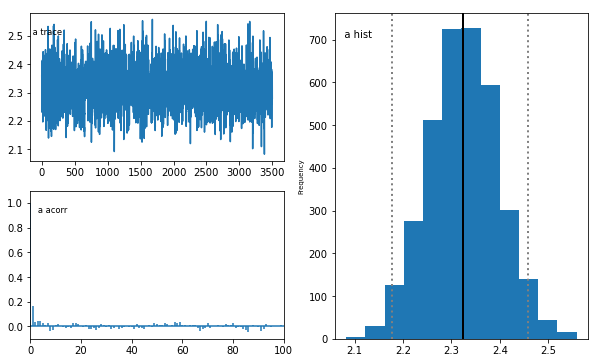

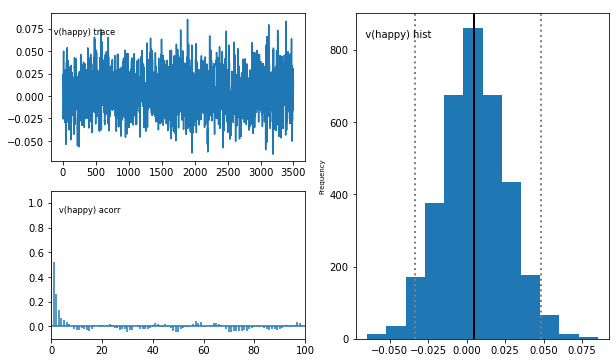

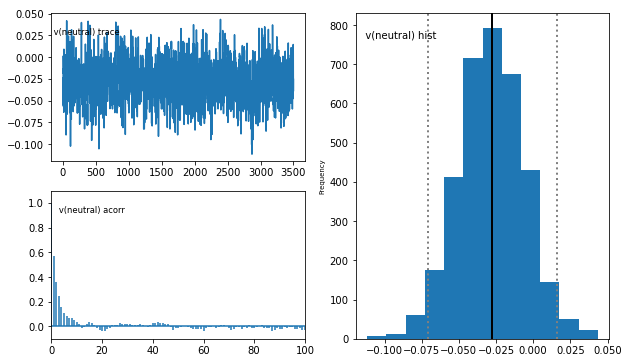

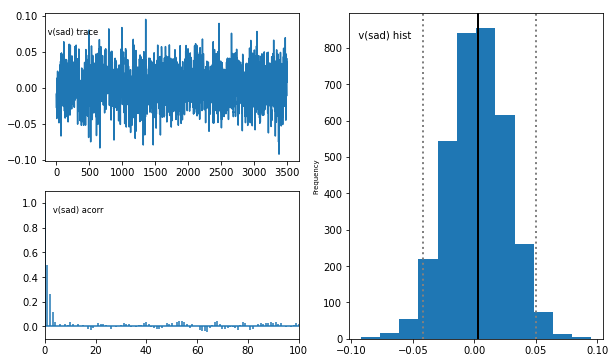

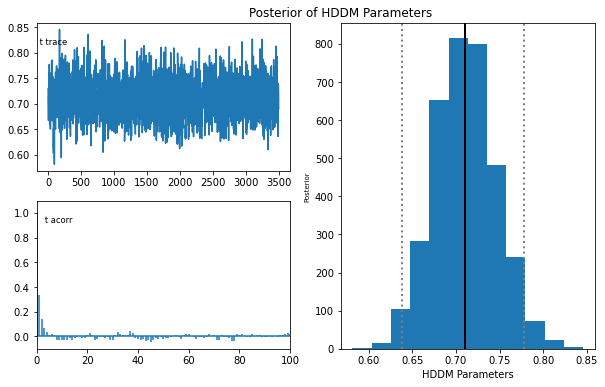

In [11]:
model_4[1].plot_posteriors(['a', 't', 'v'])

plt.xlabel('HDDM Parameters')
plt.ylabel('Posterior')
plt.title('Posterior of HDDM Parameters')

Text(0.5, 1.0, 'Posterior Predictive Plot')

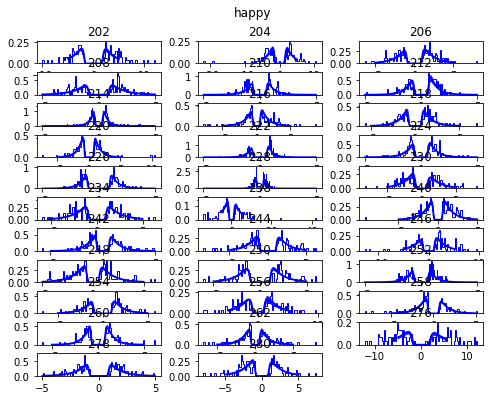

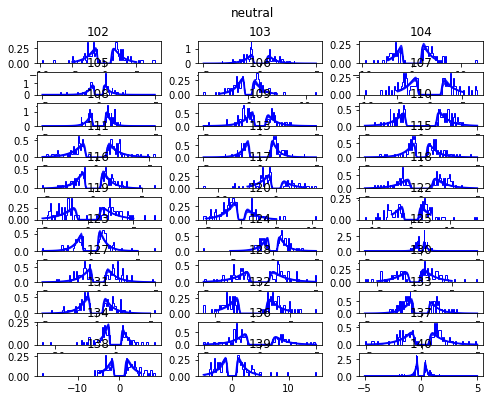

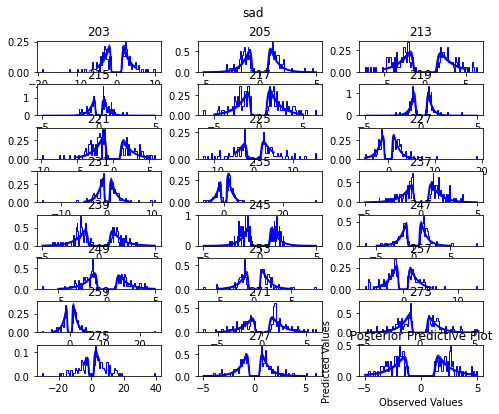

In [14]:

model_4[1].plot_posterior_predictive()

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Posterior Predictive Plot')

In [15]:
hddm.analyze.gelman_rubin(model_4)

{'a': 0.999964906079076,
 'a_std': 0.9998587098578616,
 'a_subj.102': 0.9998657906866802,
 'a_subj.103': 1.001154491569555,
 'a_subj.104': 0.9998572703645779,
 'a_subj.105': 0.9998796423857446,
 'a_subj.106': 1.0004043879484008,
 'a_subj.107': 1.0007822105061779,
 'a_subj.108': 1.0034076165760677,
 'a_subj.109': 1.0000805104668797,
 'a_subj.110': 0.9999612143730251,
 'a_subj.111': 1.0008665131228036,
 'a_subj.113': 1.0014683092060508,
 'a_subj.115': 1.0012130075412757,
 'a_subj.116': 0.9998634761003226,
 'a_subj.117': 0.999866828634809,
 'a_subj.118': 1.0004095663195032,
 'a_subj.119': 0.9999179419682509,
 'a_subj.120': 1.0000925165141257,
 'a_subj.122': 1.0019377939454852,
 'a_subj.123': 1.0005461573054937,
 'a_subj.124': 1.0000467293577642,
 'a_subj.125': 0.999860614639249,
 'a_subj.127': 0.9999745841354154,
 'a_subj.128': 0.9999039182198692,
 'a_subj.130': 0.9998827336180992,
 'a_subj.131': 1.0002295983639988,
 'a_subj.132': 0.9999404810171458,
 'a_subj.133': 0.9999923525732402,
 'a

Text(0.5, 1.0, 'Combined Posterior Predictive Plot')

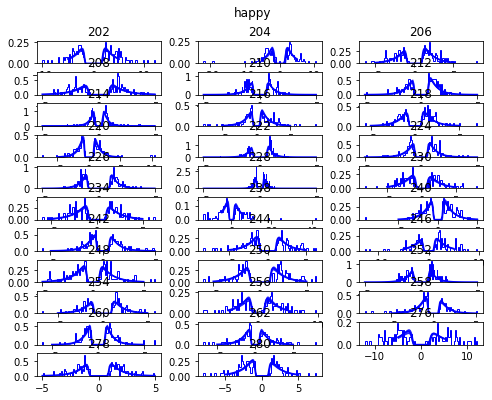

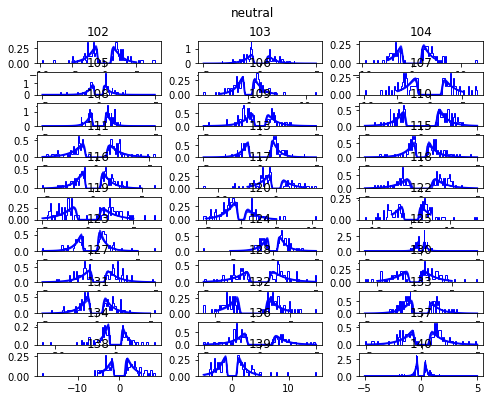

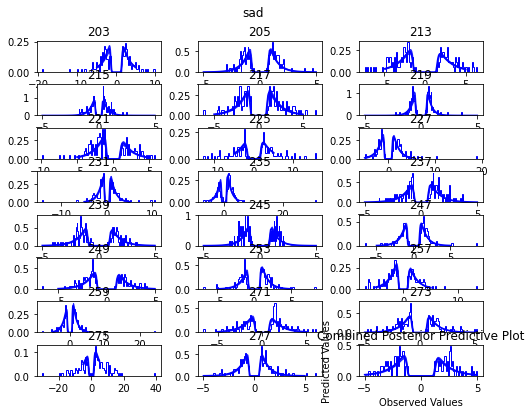

In [16]:
m_comb = kabuki.utils.concat_models(model_4) # combine four chains together
m_comb.plot_posterior_predictive()

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Combined Posterior Predictive Plot')

In [17]:
print("Simple model DIC: %f" % model_1[0].dic)

NameError: name 'model_1' is not defined

In [ ]:
print("Simple model DIC: %f" % model_1[1].dic)

Text(0.5, 1.0, 'Posterior of drift-rate group means')

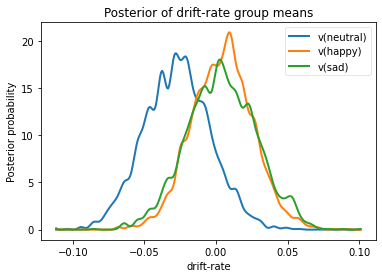

In [27]:
#how does it know which is which?
v_happy, v_sad, v_neutral = model_4[0].nodes_db.node[['v(happy)', 'v(sad)', 'v(neutral)']]
hddm.analyze.plot_posterior_nodes([ v_neutral, v_happy, v_sad])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

Text(0.5, 1.0, 'Posterior of drift-rate group means')

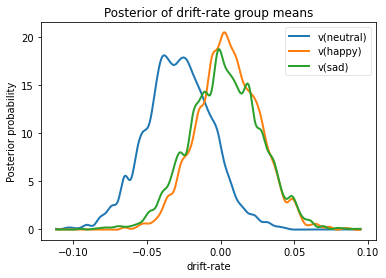

In [28]:
#how does it know which is which?
v_happy, v_sad, v_neutral = model_4[1].nodes_db.node[['v(happy)', 'v(sad)', 'v(neutral)']]
hddm.analyze.plot_posterior_nodes([ v_neutral, v_happy, v_sad])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

In [26]:
#check if drift rate for happy/sad are larger than neutral - bayeasian t-test
print("P(Happy > Neutral) = ", (v_happy.trace() > v_neutral.trace()).mean())
print("P(Sad > Neutral) = ", (v_sad.trace() > v_neutral.trace()).mean())

P(Happy > Neutral) =  0.8622857142857143
P(Sad > Neutral) =  0.8317142857142857
